In [2]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import json

In [12]:
CONVERTED_DATABASE_NAME = '/Users/darylwilding-mcbride/Downloads/HeLa_20KInt-rt-4340-4580/HeLa_20KInt.sqlite'

In [13]:
MS1_CE = 10

In [14]:
db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
ms1_frame_properties_df = pd.read_sql_query("select frame_id,retention_time_secs from frame_properties where collision_energy == {}".format(MS1_CE), db_conn)
db_conn.close()

In [15]:
# get the ms1 frame IDs
ms1_frame_ids = tuple(ms1_frame_properties_df.astype(int).values[:,0])

In [16]:
db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
frame_intensity_df = pd.read_sql_query("select frame_id,sum(intensity),retention_time_secs from frames where frame_id in {} group by frame_id order by retention_time_secs".format(ms1_frame_ids), db_conn)
db_conn.close()

In [17]:
frame_intensity_df.head()

,frame_id,sum(intensity),retention_time_secs
0,40411,26039288,4340.340330
1,40422,26141756,4341.521415
2,40433,25541105,4342.702923
3,40444,24568661,4343.883324
4,40455,23437392,4345.067491


In [18]:
frame_intensity_df.rename(columns={'sum(intensity)':'intensity'}, inplace=True)


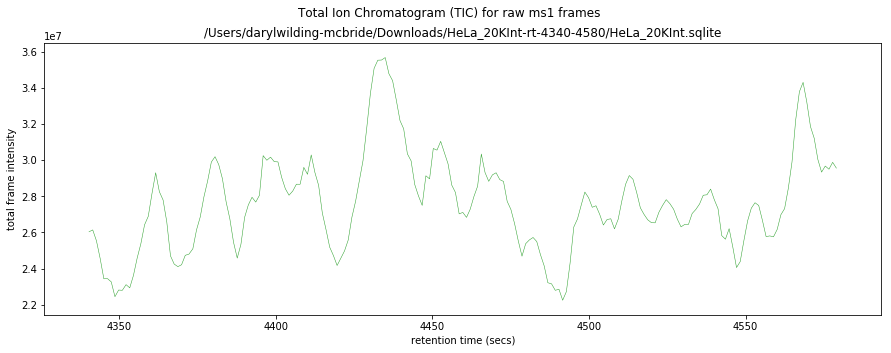

In [23]:
f, ax1 = plt.subplots()
f.set_figheight(5)
f.set_figwidth(15)
ax1.set_ylabel('total frame intensity')
ax1.set_xlabel('retention time (secs)')
ax1.plot(frame_intensity_df.retention_time_secs, frame_intensity_df.intensity, marker='', linestyle='-', linewidth=0.5, ms=2, color='tab:green', label='frame')
# plt.legend(loc='best')
plt.margins(0.06)
plt.suptitle('Total Ion Chromatogram (TIC) for raw ms1 frames')
plt.title('{}'.format(db_name))
plt.show()